# Data Preprocessing

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load MNIST dataset with parser set to 'auto'
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist['data'], mnist['target']

In [4]:
# Convert string labels to integers
y = y.astype(np.uint8)

In [5]:
# Split the dataset into training and testing sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, stratify=y, random_state=42)

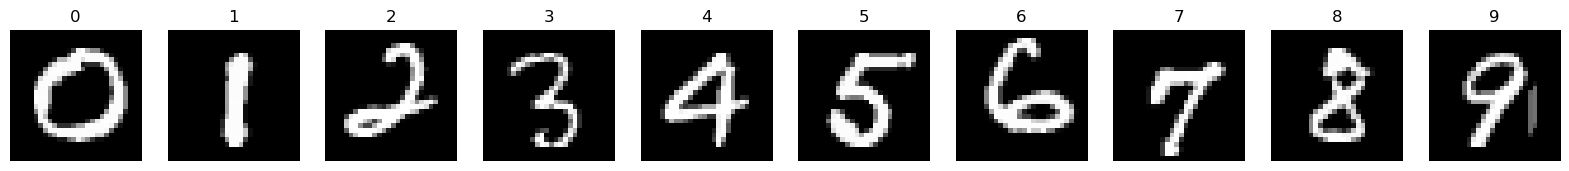

In [6]:
# Display unique images from the training set
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    # Find the index of the first occurrence of each class
    index = np.where(y_train == i)[0][0]
    axes[i].imshow(X_train.iloc[index].values.reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(str(i))
plt.show()

In [7]:
# Standardize the data
scaler = StandardScaler()
# Reshape the data to 1D per sample before scaling
X_train_reshaped = X_train.values.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], -1))
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

In [8]:
# Reshape back to the original shape after scaling
X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

# Principal Component Analysis (PCA)

In [9]:
from sklearn.decomposition import PCA

In [10]:
# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [11]:
# Calculate the eigenvalues and eigenvectors of the covariance matrix
# Note: They are already computed during PCA fitting process
# Eigenvalues
print('Eigenvalues:', pca.explained_variance_)
# Eigenvectors
print('Eigenvectors:\n', pca.components_)

Eigenvalues: [40.55827311 29.07112961]
Eigenvectors:
 [[-9.49613472e-18  2.92616601e-18 -5.74112049e-19 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.38346513e-16 -8.74675394e-17  1.18615850e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [12]:
# Determine the percentage of total variance explained by each principal component
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.05640834 0.04043205]


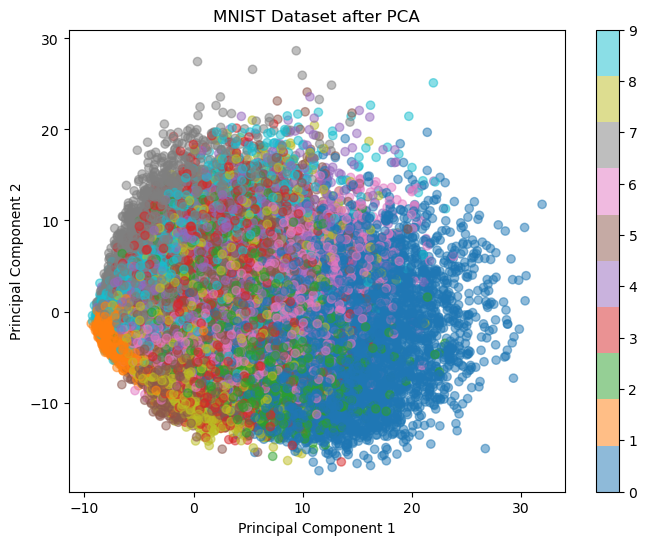

In [13]:
# Visualize the data in the new 2-dimensional PCA space
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.5)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Dataset after PCA')
plt.show()

# Gaussian Mixture Model (GMM)

In [14]:
from sklearn.mixture import GaussianMixture

In [15]:
# Choose the number of components for GMM based on BIC
bic_scores = []
components_range = range(2, 11)
for k in components_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_train_pca)
    bic_scores.append(gmm.bic(X_train_pca))

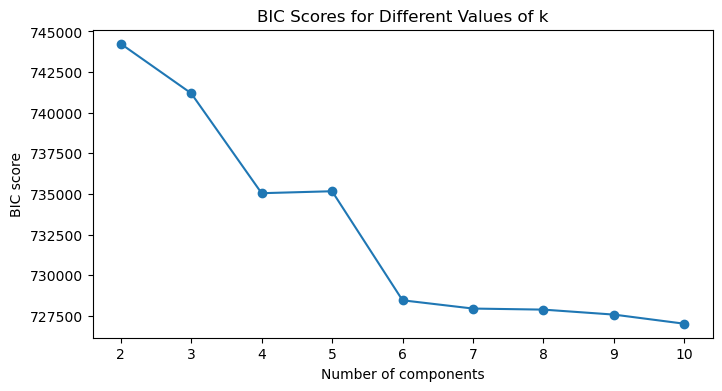

In [16]:
# Plot the BIC scores for different k values
plt.figure(figsize=(8, 4))
plt.plot(components_range, bic_scores, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC score')
plt.title('BIC Scores for Different Values of k')
plt.show()

In [17]:
# Print the best value of k
best_k = components_range[np.argmin(bic_scores)]
print('Best value of k:', best_k)

Best value of k: 10


In [18]:
# Implement the GMM algorithm to cluster the data
best_gmm = GaussianMixture(n_components=best_k, random_state=42)
best_gmm.fit(X_train_pca)

GaussianMixture(n_components=10, random_state=42)

In [19]:
# Print the final mean and covariance matrix for each component
print('Final means:\n', best_gmm.means_)
print('Final covariances:\n', best_gmm.covariances_)

Final means:
 [[-4.74126439  2.66113113]
 [ 3.57619397 -5.5807162 ]
 [15.98369189  2.89669046]
 [-7.44652152 -1.51105949]
 [ 6.06448042  2.27378888]
 [11.95452212 -7.99760897]
 [-0.40759188  6.53840671]
 [-0.34472574 -0.18060226]
 [-3.17907962 -4.09536025]
 [ 5.04708342 10.79749831]]
Final covariances:
 [[[ 2.34661649  0.78670768]
  [ 0.78670768  7.79079996]]

 [[ 9.20620114 -0.87299619]
  [-0.87299619 10.01342944]]

 [[25.16909206 -7.20758705]
  [-7.20758705 38.1947578 ]]

 [[ 0.41442505 -0.06101753]
  [-0.06101753  2.25724179]]

 [[12.65103574 -1.91856961]
  [-1.91856961 13.23323466]]

 [[18.33020045  0.24479164]
  [ 0.24479164 12.72826144]]

 [[ 6.02202349 -0.96050877]
  [-0.96050877 10.71812308]]

 [[ 7.13215575  0.15258458]
  [ 0.15258458  6.66727058]]

 [[ 4.62774439 -2.65394087]
  [-2.65394087  7.13188753]]

 [[16.13038504 -2.97690711]
  [-2.97690711 19.66058071]]]


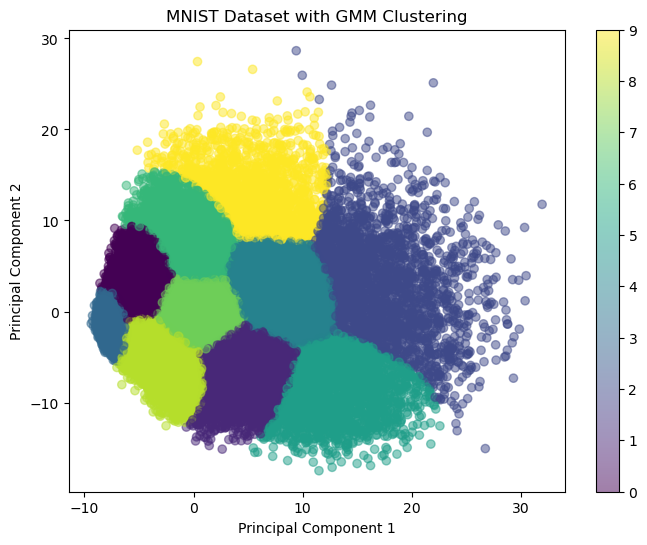

In [20]:
# Visualize the data points and the GMM components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=best_gmm.predict(X_train_pca), cmap='viridis', alpha=0.5)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Dataset with GMM Clustering')
plt.show()